In [ ]:
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.impute import SimpleImputer # For Imputation of Missing Data
from sklearn.preprocessing import MinMaxScaler # For Rescaling Data
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sps # For Probability & Inferential Statistics
import time
import psutil
from google.colab import files
import io
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree  # For Decision Tree Model
from sklearn.metrics import confusion_matrix, classification_report # For Decision Tree Model Evaluation
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/df_merge.csv",index_col=0)
df

,cluster_number,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
index,,,,,,,,,,,,,,,,,,,,,
0,0,1900-10-09T12:25:00.000Z,57.0900,-153.48,NaN,7.86,mw,NaN,NaN,NaN,...,2022-05-09T14:44:17.838Z,"16 km SW of Old Harbor, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,pt
1,0,1901-03-03T07:45:00.000Z,36.0000,-120.50,NaN,6.40,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"12 km NNW of Parkfield, California",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ell
2,0,1901-07-26T22:20:00.000Z,40.8000,-115.70,NaN,5.00,fa,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"6 km SE of Elko, Nevada",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sjg
3,0,1901-12-30T22:34:00.000Z,52.0000,-160.00,NaN,7.00,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,south of Alaska,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
4,0,1902-01-01T05:20:30.000Z,52.3800,-167.45,NaN,7.00,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"113 km ESE of Nikolski, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100984,0,2024-01-27T16:13:56.152Z,-17.7720,-172.81,8.67,5.40,mww,127.0,48.0,3.03,...,2024-02-21T22:45:42.859Z,"157 km NE of Neiafu, Tonga",earthquake,7.45,2.937,0.059,28.0,reviewed,us,us
100985,1,2024-01-27T09:33:17.650Z,-11.6262,113.39,10.00,5.40,mww,135.0,49.0,3.23,...,2024-02-17T08:07:11.200Z,"south of Java, Indonesia",earthquake,4.49,1.704,0.071,19.0,reviewed,us,us
100986,0,2024-01-27T05:52:48.423Z,14.0652,-90.62,90.00,6.10,mww,134.0,57.0,0.48,...,2024-02-23T05:43:21.698Z,"16 km W of Taxisco, Guatemala",earthquake,7.14,1.935,0.033,87.0,reviewed,us,us


In [ ]:
# Data Bifurcation
df_cat = df[['cluster_number','magType','net','type','status','locationSource','magSource']] # Categorical Data [Nominal | Ordinal]
df_noncat=df[['time','latitude','longitude','depth','mag','nst','gap','dmin','rms','id','updated','place',
              'horizontalError','depthError','magError','magNst']]# Non-Categorical Data

In [ ]:
for i in df_cat:
  count_stats = pd.concat([df_cat[i].value_counts(), df_cat[i].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
  print(i," : \n ",count_stats,"\n")

cluster_number  : 
     cluster_number  count  percentage
0               1  55868        55.0
1               0  29725        29.0
2               2  15396        15.0 

magType  : 
         magType  count  percentage
0           mb  40503        40.0
1           mw  24318        24.0
2          mwc  17458        17.0
3          mww  11258        11.0
4           ms   3223         3.0
5          mwb   3062         3.0
6           ml    572         1.0
7          mwr    397         0.0
8           md     50         0.0
9           uk     41         0.0
10          fa     30         0.0
11          mh     23         0.0
12           m     21         0.0
13         mwp      9         0.0
14          Mi      6         0.0
15  ml(texnet)      4         0.0
16       ms_20      3         0.0
17          mc      2         0.0
18          lg      2         0.0
19         mlg      1         0.0
20       mb_lg      1         0.0
21          Md      1         0.0
22          Ml      1         0.0

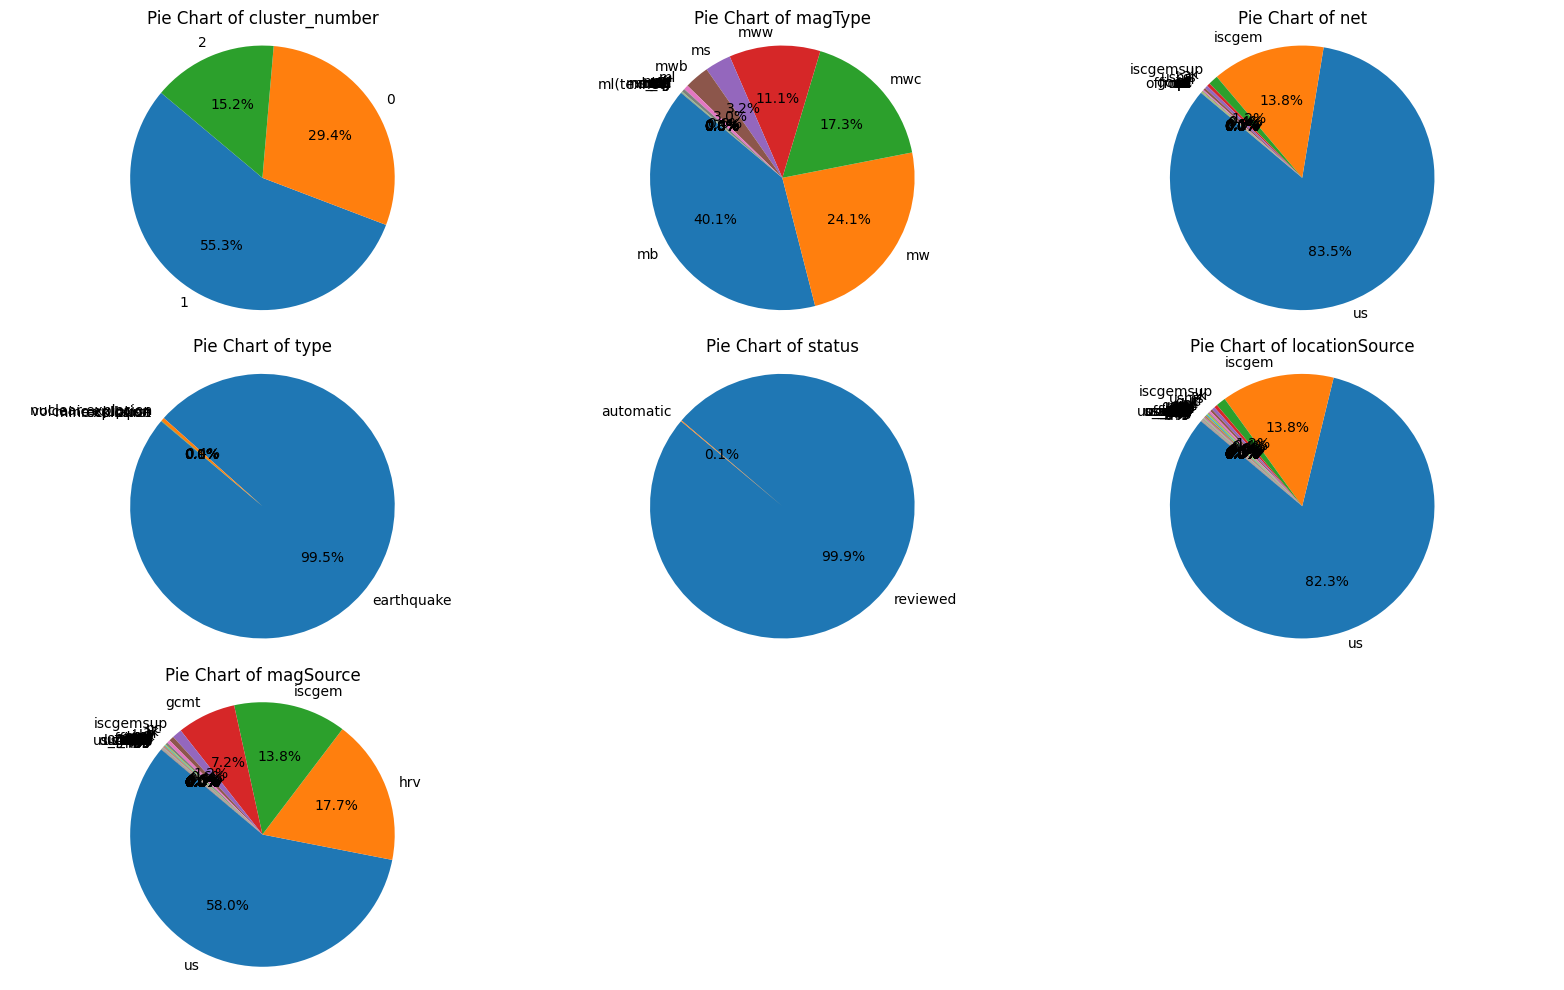

In [ ]:
import matplotlib.pyplot as plt

# Determine the number of rows and columns for the subplot grid
num_rows = 3 # Adjust as needed based on the number of categorical variables
num_cols = 3  # Adjusted for 7 graphs

# Create a subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16,10))  # Adjusted figsize for better visualization

# Flatten the axes array to easily iterate over them
axes = axes.flatten()

# Iterate over each categorical variable
for i, column in enumerate(df_cat.columns):
    # Calculate value counts for the current column
    value_counts = df_cat[column].value_counts()

    # Create a pie chart on the corresponding subplot
    ax = axes[i]
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f"Pie Chart of {column}")
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Hide the extra subplots
for j in range(len(df_cat.columns), num_rows * num_cols):
    axes[j].axis('off')

# Adjust layout and spacing
plt.tight_layout()
plt.show()

In [ ]:
df_noncat. describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,100989.000000,100989.000000,100704.000000,100989.000000,30389.000000,40682.000000,20738.000000,72244.000000,19363.000000,51276.000000,33992.000000,41008.000000
mean,3.429606,41.036982,62.336160,5.451967,155.090855,63.045442,4.246240,0.962483,7.690703,7.986893,0.171769,54.204936
std,30.043412,121.777260,108.522148,0.484050,127.021673,38.485422,5.156825,0.375573,4.396593,10.809267,0.155388,80.143921
min,-77.080000,-180.000000,-4.000000,5.000000,0.000000,6.500000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,-17.827000,-72.050000,12.600000,5.100000,65.000000,36.000000,1.290000,0.820000,6.020000,2.200000,0.060000,12.000000
50%,-1.043000,99.800000,33.000000,5.300000,114.000000,54.700000,2.610000,0.970000,7.500000,4.930000,0.098000,27.000000
75%,29.331000,142.750000,51.375000,5.700000,206.000000,80.300000,5.110000,1.100000,9.110000,9.600000,0.220000,61.000000
max,87.386000,180.000000,700.000000,9.500000,929.000000,360.000000,50.900000,69.320000,99.000000,1091.900000,1.840000,941.000000


In [ ]:
for i in ['latitude','longitude','depth','mag','nst','gap','dmin','rms',
              'horizontalError','depthError','magError','magNst']:
    # Calculate the standard deviation of each column
    std1 = round(np.std(df_noncat[i]), 2)
    print(f"Standard deviation of'{i}': {std1}")

Standard deviation of'latitude': 30.04
Standard deviation of'longitude': 121.78
Standard deviation of'depth': 108.52
Standard deviation of'mag': 0.48
Standard deviation of'nst': 127.02
Standard deviation of'gap': 38.48
Standard deviation of'dmin': 5.16
Standard deviation of'rms': 0.38
Standard deviation of'horizontalError': 4.4
Standard deviation of'depthError': 10.81
Standard deviation of'magError': 0.16
Standard deviation of'magNst': 80.14


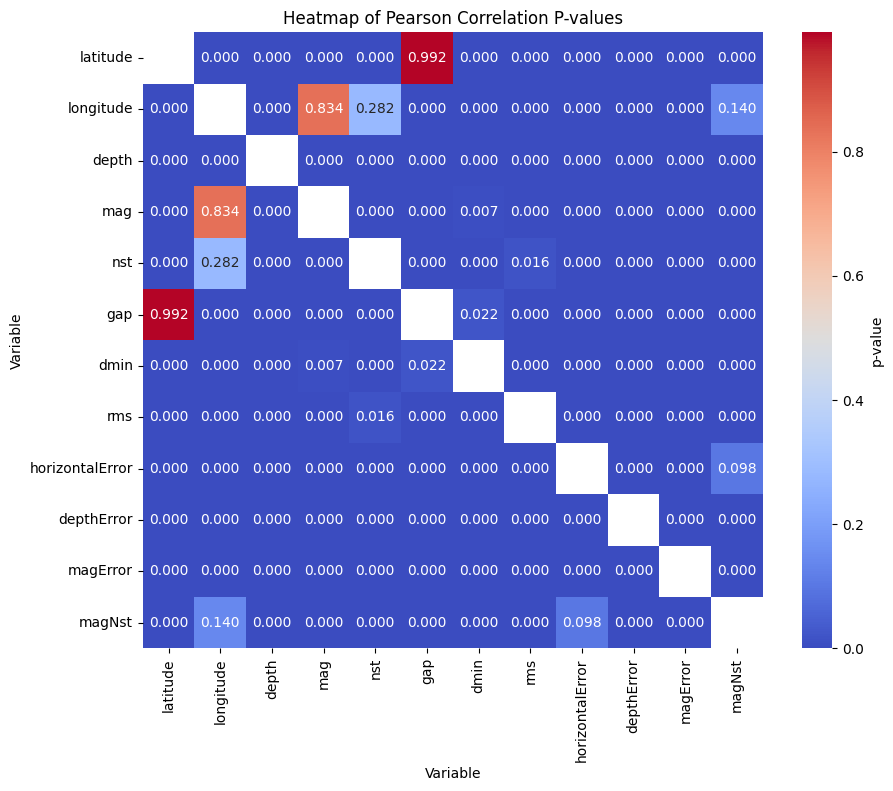

In [ ]:
cols=['latitude',	'longitude','depth', 'mag',	'nst'	,'gap',	'dmin',	'rms','horizontalError','depthError','magError','magNst']
# Initialize an empty DataFrame to store p-values
p_values_df = pd.DataFrame(index=cols, columns=cols)

# Iterate over each pair of columns
for col1 in cols:
    for col2 in cols:
        # Skip if the columns are the same or if any of them is non-numeric
        if col1 == col2 or not (df_noncat[col1].dtype == 'float64' and df_noncat[col2].dtype == 'float64'):
            continue

        # Drop rows with NaN values in both columns
        filtered_df = df_noncat[[col1, col2]].dropna()

        # Perform Pearson correlation test
        _, p_value = sps.pearsonr(filtered_df[col1], filtered_df[col2])

        # Store the p-value in the DataFrame
        p_values_df.loc[col1, col2] = p_value

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(p_values_df.astype(float), annot=True, cmap='coolwarm', fmt=".3f", cbar_kws={'label': 'p-value'})
plt.title('Heatmap of Pearson Correlation P-values')
plt.xlabel('Variable')
plt.ylabel('Variable')
plt.show()

In [ ]:
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)

index
0       9
2612    9
1217    9
9768    9
8319    9
dtype: int64

In [ ]:
# Dataset Used : df

df.info() # Dataframe Information (Provide Information on Missing Data)

<class 'pandas.core.frame.DataFrame'>
Index: 100989 entries, 0 to 100988
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   cluster_number   100989 non-null  int64  
 1   time             100989 non-null  object 
 2   latitude         100989 non-null  float64
 3   longitude        100989 non-null  float64
 4   depth            100704 non-null  float64
 5   mag              100989 non-null  float64
 6   magType          100989 non-null  object 
 7   nst              30389 non-null   float64
 8   gap              40682 non-null   float64
 9   dmin             20738 non-null   float64
 10  rms              72244 non-null   float64
 11  net              100989 non-null  object 
 12  id               100989 non-null  object 
 13  updated          100989 non-null  object 
 14  place            100100 non-null  object 
 15  type             100989 non-null  object 
 16  horizontalError  19363 non-null   float64
 

In [ ]:
variable_missing_data = df_cat.isna().sum(); variable_missing_data # Variable-wise Missing Data Information

cluster_number    0
magType           0
net               0
type              0
status            0
locationSource    0
magSource         0
dtype: int64

In [ ]:
variable_missing_data = df_noncat.isna().sum(); variable_missing_data # Variable-wise Missing Data Information

time                   0
latitude               0
longitude              0
depth                285
mag                    0
nst                70600
gap                60307
dmin               80251
rms                28745
id                     0
updated                0
place                889
horizontalError    81626
depthError         49713
magError           66997
magNst             59981
dtype: int64

In [ ]:
df_noncat_final=df_noncat.drop(['nst','gap','dmin','horizontalError','magError','magNst','time','updated','place','id',],axis=1)
df_noncat_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100989 entries, 0 to 100988
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    100989 non-null  float64
 1   longitude   100989 non-null  float64
 2   depth       100704 non-null  float64
 3   mag         100989 non-null  float64
 4   rms         72244 non-null   float64
 5   depthError  51276 non-null   float64
dtypes: float64(6)
memory usage: 5.4 MB


In [ ]:
# Dataset Used : df_noncat_final
df_noncat_missingvalues=df_noncat_final[['depth','rms','depthError']]
si_noncat = SimpleImputer(missing_values=np.nan, strategy='median')
si_noncat_fit = si_noncat.fit_transform(df_noncat_missingvalues)
# Preserve the index column in the new DataFrame
df_noncat_mdi_si = pd.DataFrame(si_noncat_fit, columns=df_noncat_missingvalues.columns, index=df_noncat_missingvalues.index)
df_noncat_mdi_si

,depth,rms,depthError
index,,,
0,33.00,0.97,4.930
1,33.00,0.97,4.930
2,33.00,0.97,4.930
3,33.00,0.97,4.930
4,33.00,0.97,4.930
...,...,...,...
100984,8.67,0.83,2.937
100985,10.00,0.46,1.704
100986,90.00,0.84,1.935


In [ ]:
# Merge df_noncat_mdi_si1 and df_noncat_mdi_si2 on index
merged_df_noncat = pd.merge(df_noncat_final[['latitude', 'longitude','mag']], df_noncat_mdi_si, left_index=True, right_index=True)
merged_df_noncat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100989 entries, 0 to 100988
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    100989 non-null  float64
 1   longitude   100989 non-null  float64
 2   mag         100989 non-null  float64
 3   depth       100989 non-null  float64
 4   rms         100989 non-null  float64
 5   depthError  100989 non-null  float64
dtypes: float64(6)
memory usage: 9.4 MB


In [ ]:
# Excluding Empty Records (If Any)
df_cat.dropna(axis=0, how='all', inplace=True) # Categorical Data Subset
merged_df_noncat.dropna(axis=0, how='all', inplace=True) # Non-Categorical Data Subset

<ipython-input-18-809b5d7d7681>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.dropna(axis=0, how='all', inplace=True) # Categorical Data Subset


In [ ]:
# Excluding Empty Variables (If Any)
df_cat.dropna(axis=1, how='all', inplace=True) # Categorical Data Subset
merged_df_noncat.dropna(axis=1, how='all', inplace=True) # Non-Categorical Data Subset

<ipython-input-19-d0549340a631>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.dropna(axis=1, how='all', inplace=True) # Categorical Data Subset


In [ ]:
# Dataset Used : df_cat_mdt
df_cat_mdt_code = df_cat.copy()

In [ ]:
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat_mdt_code)
df_cat_code_oe = pd.DataFrame(oe_fit, columns=df_cat_mdt_code.columns);
df_cat_mdt_code_oe = pd.merge(df_cat_mdt_code,df_cat_code_oe, left_index=True, right_index=True); df_cat_mdt_code_oe

,cluster_number_x,magType_x,net_x,type_x,status_x,locationSource_x,magSource_x,cluster_number_y,magType_y,net_y,type_y,status_y,locationSource_y,magSource_y
index,,,,,,,,,,,,,,
0,0,mw,ushis,earthquake,reviewed,ushis,pt,0.0,19.0,18.0,0.0,1.0,83.0,64.0
1,0,ms,ushis,earthquake,reviewed,ushis,ell,0.0,17.0,18.0,0.0,1.0,83.0,24.0
2,0,fa,ushis,earthquake,reviewed,ushis,sjg,0.0,4.0,18.0,0.0,1.0,83.0,73.0
3,0,ms,ushis,earthquake,reviewed,ushis,abe,0.0,17.0,18.0,0.0,1.0,83.0,4.0
4,0,ms,ushis,earthquake,reviewed,ushis,abe,0.0,17.0,18.0,0.0,1.0,83.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100984,0,mww,us,earthquake,reviewed,us,us,0.0,24.0,17.0,0.0,1.0,78.0,80.0
100985,1,mww,us,earthquake,reviewed,us,us,1.0,24.0,17.0,0.0,1.0,78.0,80.0
100986,0,mww,us,earthquake,reviewed,us,us,0.0,24.0,17.0,0.0,1.0,78.0,80.0


<Figure size 800x400 with 0 Axes>

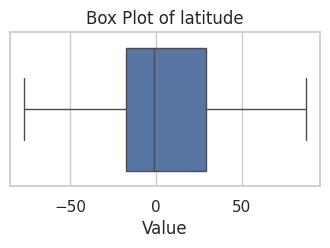

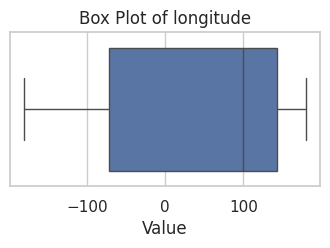

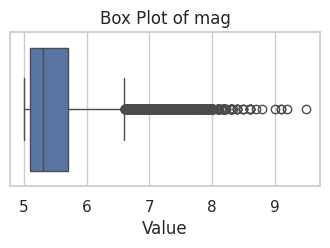

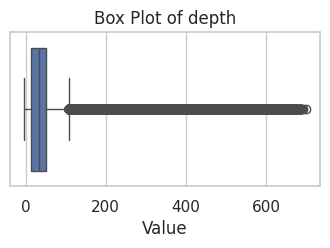

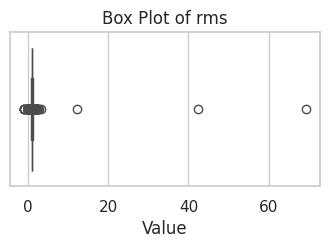

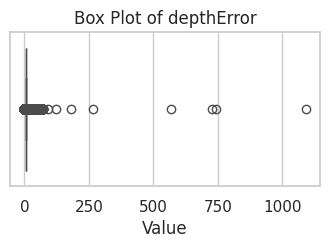

In [ ]:
# Assuming merged_df_noncat is your DataFrame containing the specified columns
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to include in the box plot
columns = ['latitude', 'longitude', 'mag','depth', 'rms',
       'depthError']

# Create box plots for each column
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")

for column in columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(data=merged_df_noncat[column], orient="h")
    plt.title(f"Box Plot of {column}")
    plt.xlabel("Value")
    plt.show()

In [ ]:
df_noncat_mdt=merged_df_noncat[['mag','depth', 'rms','depthError']].copy()
#other_columns=df_noncat_final.loc[:, ~df_noncat_final.columns.isin(df_noncat_mdt.columns)]

In [ ]:
# 3.2.1. Normalization : Min-Max Scaling
mms = MinMaxScaler()
mms_fit = mms.fit_transform(df_noncat_mdt)
df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=df_noncat_mdt.columns+'_mn'); df_noncat_minmax_norm
df_noncat_mdt_mmn = pd.merge(merged_df_noncat, df_noncat_minmax_norm, left_index=True, right_index=True); df_noncat_mdt_mmn

,latitude,longitude,mag,depth,rms,depthError,mag_mn,depth_mn,rms_mn,depthError_mn
index,,,,,,,,,,
0,57.0900,-153.48,7.86,33.00,0.97,4.930,0.635556,0.052557,0.028015,0.005426
1,36.0000,-120.50,6.40,33.00,0.97,4.930,0.311111,0.052557,0.028015,0.005426
2,40.8000,-115.70,5.00,33.00,0.97,4.930,0.000000,0.052557,0.028015,0.005426
3,52.0000,-160.00,7.00,33.00,0.97,4.930,0.444444,0.052557,0.028015,0.005426
4,52.3800,-167.45,7.00,33.00,0.97,4.930,0.444444,0.052557,0.028015,0.005426
...,...,...,...,...,...,...,...,...,...,...
100984,-17.7720,-172.81,5.40,8.67,0.83,2.937,0.088889,0.017997,0.026024,0.003602
100985,-11.6262,113.39,5.40,10.00,0.46,1.704,0.088889,0.019886,0.020762,0.002474
100986,14.0652,-90.62,6.10,90.00,0.84,1.935,0.244444,0.133523,0.026166,0.002686


In [ ]:
# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_mdt_code_oe.copy(); df_cat_ppd

,cluster_number_x,magType_x,net_x,type_x,status_x,locationSource_x,magSource_x,cluster_number_y,magType_y,net_y,type_y,status_y,locationSource_y,magSource_y
index,,,,,,,,,,,,,,
0,0,mw,ushis,earthquake,reviewed,ushis,pt,0.0,19.0,18.0,0.0,1.0,83.0,64.0
1,0,ms,ushis,earthquake,reviewed,ushis,ell,0.0,17.0,18.0,0.0,1.0,83.0,24.0
2,0,fa,ushis,earthquake,reviewed,ushis,sjg,0.0,4.0,18.0,0.0,1.0,83.0,73.0
3,0,ms,ushis,earthquake,reviewed,ushis,abe,0.0,17.0,18.0,0.0,1.0,83.0,4.0
4,0,ms,ushis,earthquake,reviewed,ushis,abe,0.0,17.0,18.0,0.0,1.0,83.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100984,0,mww,us,earthquake,reviewed,us,us,0.0,24.0,17.0,0.0,1.0,78.0,80.0
100985,1,mww,us,earthquake,reviewed,us,us,1.0,24.0,17.0,0.0,1.0,78.0,80.0
100986,0,mww,us,earthquake,reviewed,us,us,0.0,24.0,17.0,0.0,1.0,78.0,80.0


In [ ]:
# Pre-Processed Non-Categorical Data Subset
df_noncat_ppd = df_noncat_mdt_mmn.copy(); df_noncat_ppd

,latitude,longitude,mag,depth,rms,depthError,mag_mn,depth_mn,rms_mn,depthError_mn
index,,,,,,,,,,
0,57.0900,-153.48,7.86,33.00,0.97,4.930,0.635556,0.052557,0.028015,0.005426
1,36.0000,-120.50,6.40,33.00,0.97,4.930,0.311111,0.052557,0.028015,0.005426
2,40.8000,-115.70,5.00,33.00,0.97,4.930,0.000000,0.052557,0.028015,0.005426
3,52.0000,-160.00,7.00,33.00,0.97,4.930,0.444444,0.052557,0.028015,0.005426
4,52.3800,-167.45,7.00,33.00,0.97,4.930,0.444444,0.052557,0.028015,0.005426
...,...,...,...,...,...,...,...,...,...,...
100984,-17.7720,-172.81,5.40,8.67,0.83,2.937,0.088889,0.017997,0.026024,0.003602
100985,-11.6262,113.39,5.40,10.00,0.46,1.704,0.088889,0.019886,0.020762,0.002474
100986,14.0652,-90.62,6.10,90.00,0.84,1.935,0.244444,0.133523,0.026166,0.002686


In [ ]:
# Pre-Processed Dataset
df_ppd = pd.merge(df_cat_ppd, df_noncat_ppd, left_index=True, right_index=True)

In [ ]:
new_df=df_ppd.drop(['magType_x', 'net_x', 'type_x', 'status_x','locationSource_x',
                            'magSource_x', 'cluster_number_y', 'mag', 'depth', 'rms','depthError'], axis=1)

In [ ]:
new_df.columns

Index(['cluster_number_x', 'magType_y', 'net_y', 'type_y', 'status_y',
       'locationSource_y', 'magSource_y', 'latitude', 'longitude', 'mag_mn',
       'depth_mn', 'rms_mn', 'depthError_mn'],
      dtype='object')

In [ ]:
# Analysis Objective : Segment the earthquake based on cluster number and other columns
earthquake_inputs = new_df[[ 'magType_y', 'net_y', 'type_y', 'status_y',
       'locationSource_y', 'magSource_y','mag_mn',
       'depth_mn', 'rms_mn', 'depthError_mn']]; earthquake_inputs
earthquake_outputs=new_df[['cluster_number_x']]; #earthquake_outputs

In [ ]:
earthquake_inputs_names = earthquake_inputs.columns; earthquake_inputs_names
earthquake_outputs_labels = earthquake_outputs['cluster_number_x'].unique().astype(str); earthquake_outputs_labels

array(['0', '1', '2'], dtype='<U21')

In [ ]:
# Initialize StratifiedShuffleSplit with desired test size and random state
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=45020)
# Perform the stratified split to get training and testing indices
for i, j in stratified_split.split(earthquake_inputs, earthquake_outputs):
    train_earthquake_inputs, test_earthquake_inputs = earthquake_inputs.iloc[i], earthquake_inputs.iloc[j]
    train_earthquake_outputs, test_earthquake_outputs = earthquake_outputs.iloc[i], earthquake_outputs.iloc[j]

In [ ]:
def memory_usage():
    """
    Function to get memory usage.
    """
    process = psutil.Process()
    mem = process.memory_info().rss
    return mem / (1024 * 1024)  # Convert to MB

In [ ]:
#start time
start_dt = time.time()
# Measure memory usage
memory_before_dt = memory_usage()

In [ ]:
# Decision Tree : Model (Training Subset)
dtc = DecisionTreeClassifier(criterion='gini', random_state=45020,max_depth = 3) # Other Criteria : Entropy,  Log Loss
dtc_model = dtc.fit(train_earthquake_inputs, train_earthquake_outputs); dtc_model

DecisionTreeClassifier(max_depth=3, random_state=45020)

In [ ]:
# Decision Tree : Model Rules
dtc_model_rules = export_text(dtc_model, feature_names = list(earthquake_inputs_names),); print(dtc_model_rules)

|--- depth_mn <= 0.03
|   |--- locationSource_y <= 30.50
|   |   |--- magType_y <= 19.50
|   |   |   |--- class: 0
|   |   |--- magType_y >  19.50
|   |   |   |--- class: 0
|   |--- locationSource_y >  30.50
|   |   |--- magSource_y <= 50.50
|   |   |   |--- class: 2
|   |   |--- magSource_y >  50.50
|   |   |   |--- class: 1
|--- depth_mn >  0.03
|   |--- depth_mn <= 0.76
|   |   |--- locationSource_y <= 30.50
|   |   |   |--- class: 0
|   |   |--- locationSource_y >  30.50
|   |   |   |--- class: 1
|   |--- depth_mn >  0.76
|   |   |--- depthError_mn <= 0.00
|   |   |   |--- class: 1
|   |   |--- depthError_mn >  0.00
|   |   |   |--- class: 0



In [ ]:
# Decision Tree : Feature Importance
dtc_imp_features = pd.DataFrame({'feature': earthquake_inputs_names, 'importance': np.round(dtc_model.feature_importances_, 2)})
dtc_imp_features.sort_values('importance', ascending=False, inplace=True); dtc_imp_features

,feature,importance
7,depth_mn,0.72
4,locationSource_y,0.23
5,magSource_y,0.05
0,magType_y,0.00
1,net_y,0.00
2,type_y,0.00
3,status_y,0.00
6,mag_mn,0.00
8,rms_mn,0.00
9,depthError_mn,0.00


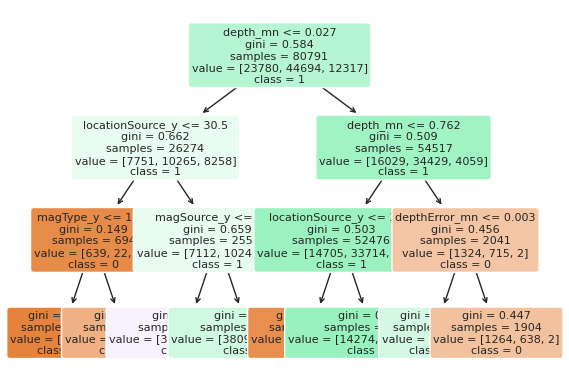

In [ ]:
# Decision Tree : Plot [Training Subset]
train_subset_dtc_plot = plot_tree(dtc_model, feature_names=earthquake_inputs_names, class_names=earthquake_outputs_labels, rounded=True, filled=True, fontsize=8)
plt.show()

In [ ]:
# Decision Tree : Prediction (Testing Subset)
dtc_model_predict_test = dtc_model.predict(test_earthquake_inputs); dtc_model_predict_test

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Decision Tree : Prediction Evaluation (Testing Subset)
dtc_predict_conf_mat = pd.DataFrame(confusion_matrix(test_earthquake_outputs, dtc_model_predict_test));print(dtc_predict_conf_mat)
dtc_predict_perf = classification_report(test_earthquake_outputs, dtc_model_predict_test);  print(dtc_predict_perf)

     0     1     2
0  582  4539   824
1  167  9997  1010
2   14  1940  1125
              precision    recall  f1-score   support

           0       0.76      0.10      0.17      5945
           1       0.61      0.89      0.72     11174
           2       0.38      0.37      0.37      3079

    accuracy                           0.58     20198
   macro avg       0.58      0.45      0.42     20198
weighted avg       0.62      0.58      0.51     20198



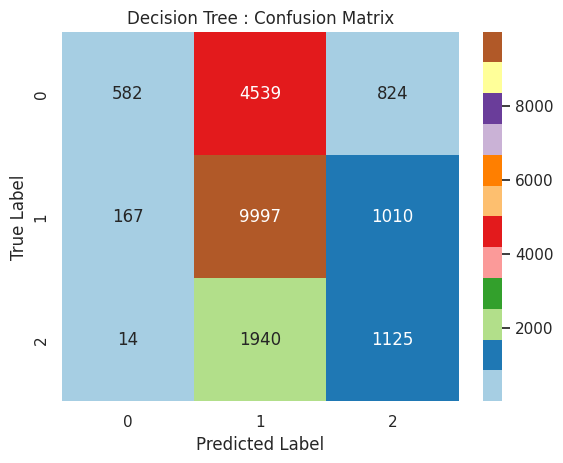

In [ ]:
# Set up the plot
ax = plt.axes()

# Plot the confusion matrix with annotations in integer format
sns.heatmap(dtc_predict_conf_mat, annot=True, fmt='d', cmap='Paired')
# Set labels and title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Decision Tree : Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
# end time
end_dt = time.time()
# Memory afterward
memory_after_dt = memory_usage()

# total time taken
print(f"Runtime of the program is {end_dt - start_dt}")
print("Memory usage difference:", memory_after_dt - memory_before_dt, "MB")

Runtime of the program is 1.1139459609985352
Memory usage difference: 6.3125 MB


#SVM

In [ ]:
#start time
start_svm = time.time()
# Measure memory usage
memory_before_svm = memory_usage()

In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(random_state=45020)

In [ ]:
# Train the SVM model on the training subset
svm_model = svm_classifier.fit(train_earthquake_inputs, train_earthquake_outputs)
svm_model

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=45020)

In [ ]:
# Make predictions on the testing subset
svm_predict = svm_model.predict(test_earthquake_inputs)
svm_predict

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# SVM : Prediction Evaluation (Testing Subset)
svm_predict_conf_mat = pd.DataFrame(confusion_matrix(test_earthquake_outputs, svm_predict)); print(svm_predict_conf_mat)
svm_predict_perf = classification_report(test_earthquake_outputs, svm_predict); print(svm_predict_perf)

     0      1  2
0  287   5658  0
1   23  11151  0
2   32   3047  0
              precision    recall  f1-score   support

           0       0.84      0.05      0.09      5945
           1       0.56      1.00      0.72     11174
           2       0.00      0.00      0.00      3079

    accuracy                           0.57     20198
   macro avg       0.47      0.35      0.27     20198
weighted avg       0.56      0.57      0.42     20198



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


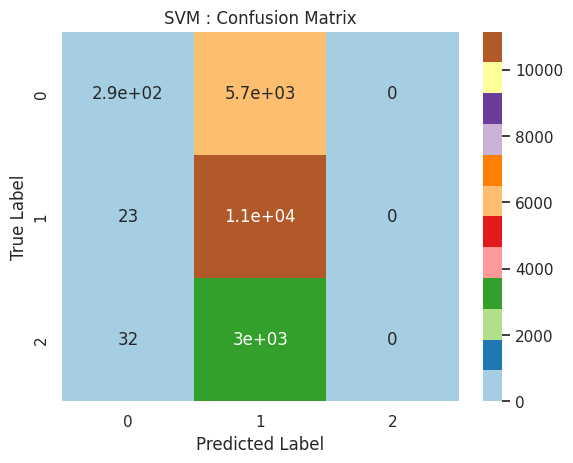

In [ ]:
# Confusion Matrix : Plot [Testing Subset]
ax = plt.axes()
sns.heatmap(svm_predict_conf_mat, annot=True, cmap='Paired')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('SVM : Confusion Matrix')
plt.show()

In [ ]:
# end time
end_svm = time.time()
# Memory afterward
memory_after_svm = memory_usage()

# total time taken
print(f"Runtime of the program is {end_svm - start_svm}")
print("Memory usage difference:", memory_after_svm - memory_before_svm, "MB")

Runtime of the program is 644.0512936115265
Memory usage difference: 82.421875 MB


#KNN

In [212]:
#start time
start_knn = time.time()
# Measure memory usage
memory_before_knn = memory_usage()

In [213]:
# Initialize and fit the KNN classifier
n=5
knn_classifier = KNeighborsClassifier(n_neighbors=n)  # Adjust n_neighbors as needed
knn_classifier.fit(train_earthquake_inputs, train_earthquake_outputs)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [214]:
# Make predictions on the test dataset
knn_predictions = knn_classifier.predict(test_earthquake_inputs)

In [215]:
# KNN : Prediction Evaluation (Testing Subset)
knn_predict_conf_mat = pd.DataFrame(confusion_matrix(test_earthquake_outputs, knn_predictions)); print(knn_predict_conf_mat)
knn_predict_perf = classification_report(test_earthquake_outputs,knn_predictions); print(knn_predict_perf)

      0     1    2
0  2372  3195  378
1  2481  8171  522
2   788  1463  828
              precision    recall  f1-score   support

           0       0.42      0.40      0.41      5945
           1       0.64      0.73      0.68     11174
           2       0.48      0.27      0.34      3079

    accuracy                           0.56     20198
   macro avg       0.51      0.47      0.48     20198
weighted avg       0.55      0.56      0.55     20198



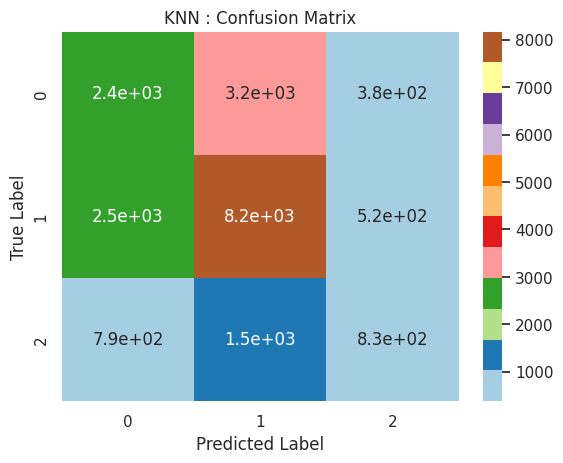

In [216]:
# Confusion Matrix : Plot [Testing Subset]
ax = plt.axes()
sns.heatmap(knn_predict_conf_mat, annot=True, cmap='Paired')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('KNN : Confusion Matrix')
plt.show()

In [217]:
k_values = [7, 9, 11, 13, 15]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_earthquake_inputs, train_earthquake_outputs)  # Use your training data here
    y_pred = knn.predict(test_earthquake_inputs)  # Use your testing data here
    accuracy = accuracy_score(test_earthquake_outputs,y_pred)  # Compare predictions with true labels
    print(f'Accuracy at k={k}: {accuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy at k=7: 0.5686206555104466


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy at k=9: 0.5792652737894841


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy at k=11: 0.5861966531339736


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy at k=13: 0.5878799881176354


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy at k=15: 0.5934250915932271


In [218]:
# end time
end_knn = time.time()
# Memory afterward
memory_after_knn = memory_usage()

# total time taken
print(f"Runtime of the program is {end_knn - start_knn}")
print("Memory usage difference:", memory_after_knn - memory_before_knn, "MB")

Runtime of the program is 50.13966107368469
Memory usage difference: 6.828125 MB


In [219]:
#start time
start_lr = time.time()
# Measure memory usage
memory_before_lr = memory_usage()

In [220]:
# Creating and training the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(train_earthquake_inputs, train_earthquake_outputs)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [221]:
# Making predictions on the test set
log_predictions = logistic_regression.predict(test_earthquake_inputs)

In [222]:
#Logistic Regression : Prediction Evaluation (Testing Subset)
log_predict_conf_mat = pd.DataFrame(confusion_matrix(test_earthquake_outputs, log_predictions)); print(log_predict_conf_mat)
log_predict_perf = classification_report(test_earthquake_outputs,log_predictions); print(log_predict_perf)

     0      1  2
0  678   5267  0
1  401  10773  0
2   72   3007  0
              precision    recall  f1-score   support

           0       0.59      0.11      0.19      5945
           1       0.57      0.96      0.71     11174
           2       0.00      0.00      0.00      3079

    accuracy                           0.57     20198
   macro avg       0.38      0.36      0.30     20198
weighted avg       0.49      0.57      0.45     20198



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


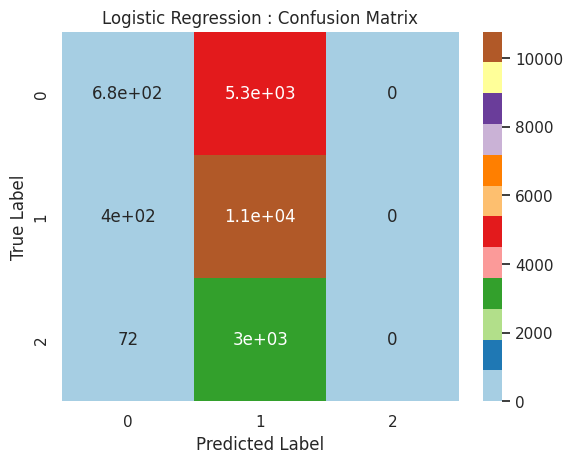

In [223]:
# Confusion Matrix : Plot [Testing Subset]
ax = plt.axes()
sns.heatmap(log_predict_conf_mat, annot=True, cmap='Paired')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Logistic Regression : Confusion Matrix')
plt.show()

In [224]:
# end time
end_lr = time.time()
# Memory afterward
memory_after_lr = memory_usage()

# total time taken
print(f"Runtime of the program is {end_lr - start_lr}")
print("Memory usage difference:", memory_after_lr - memory_before_lr, "MB")

Runtime of the program is 2.0558314323425293
Memory usage difference: 0.7734375 MB
